<a href="https://colab.research.google.com/github/fpabi/Tareas/blob/main/Tarea_19_Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 19
###Fabiana Pavón
###Prof: Lazaro Bustio
Objetivo: Entender el análisis exploratorio

In [1]:
import pandas as pd
import io
from google.colab import files
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
uploaded = files.upload()

Saving datos_marketing.csv to datos_marketing.csv


In [3]:
marketing=pd.read_csv(io.BytesIO(uploaded["datos_marketing.csv"]),sep=',',decimal='.')
marketing.shape

(100, 4)

In [4]:
marketing.describe()

,Gasto_TV,Gasto_Radio,Gasto_Digital,Ventas
count,100.000000,100.000000,100.000000,100.000000
mean,2891.175358,1292.122634,862.521579,1949.573421
std,1159.016061,417.154481,394.160745,683.051287
min,1018.781905,517.571126,217.207915,453.576401
25%,1823.212630,943.395672,510.111089,1390.400638
50%,2869.923949,1362.861937,855.661726,2030.527730
75%,3737.933017,1595.035144,1224.889310,2312.270885
max,4953.495352,1998.270510,1487.440632,3723.302172


<Axes: >

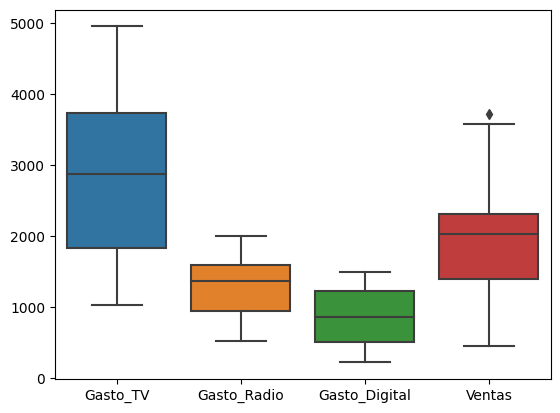

In [5]:
sns.boxplot(marketing)

In [6]:
correlation=marketing.corr()
correlation

,Gasto_TV,Gasto_Radio,Gasto_Digital,Ventas
Gasto_TV,1.000000,-0.066107,-0.036512,0.716060
Gasto_Radio,-0.066107,1.000000,-0.124047,0.029609
Gasto_Digital,-0.036512,-0.124047,1.000000,0.131545
Ventas,0.716060,0.029609,0.131545,1.000000


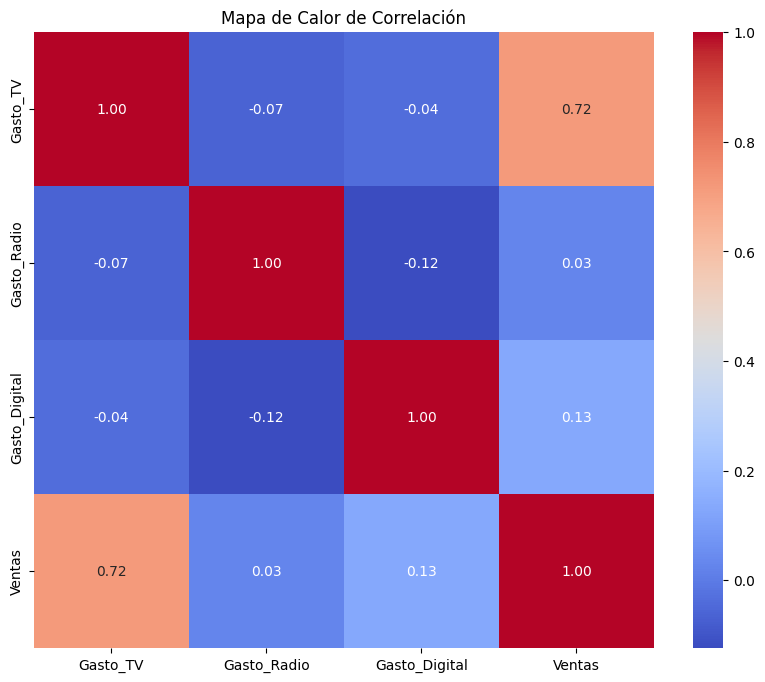

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

In [8]:
valores_faltantes = marketing.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
Gasto_TV         0
Gasto_Radio      0
Gasto_Digital    0
Ventas           0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Crear una copia del DataFrame original
marketing_normalized = marketing.copy()

# Inicializa el objeto StandardScaler
scaler = StandardScaler()

# Aplica la normalización a las características numéricas en la copia
numeric_columns = marketing_normalized.select_dtypes(include=['int64', 'float64'])
marketing_normalized[numeric_columns.columns] = scaler.fit_transform(numeric_columns)




In [10]:
marketing.head()

,Gasto_TV,Gasto_Radio,Gasto_Digital,Ventas
0,3195.254016,1516.724805,605.334647,2261.964648
1,3860.757465,905.011960,1105.246535,2549.022146
2,3411.053504,1602.791033,691.077391,2035.921506
3,3179.532732,1943.282818,433.484781,2150.487303
4,2694.619197,873.129715,232.082347,953.634528


In [11]:
marketing_normalized.head()

,Gasto_TV,Gasto_Radio,Gasto_Digital,Ventas
0,0.263681,0.541127,-0.655780,0.459651
1,0.840771,-0.932654,0.618904,0.882025
2,0.450811,0.748484,-0.437151,0.127052
3,0.250048,1.568821,-1.093965,0.295624
4,-0.170443,-1.009467,-1.607505,-1.465419


In [12]:
from sklearn.model_selection import train_test_split

# Dividir el DataFrame "marketing" en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(marketing, test_size=0.3, random_state=42)



In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 11 to 51
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gasto_TV       70 non-null     float64
 1   Gasto_Radio    70 non-null     float64
 2   Gasto_Digital  70 non-null     float64
 3   Ventas         70 non-null     float64
dtypes: float64(4)
memory usage: 2.7 KB


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 83 to 72
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gasto_TV       30 non-null     float64
 1   Gasto_Radio    30 non-null     float64
 2   Gasto_Digital  30 non-null     float64
 3   Ventas         30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB
